# Real Estate Price Predictor

In [ ]:
import pandas as pd
import numpy as np

: 

In [ ]:
# shows images here itself
%matplotlib inline
import matplotlib.pyplot as plt

: 

## Loading Dataset

In [ ]:
housing = pd.read_csv("F:\GitHub\PricePredictionML\Dataset\data.csv")

: 

## Checking Description of dataset

In [ ]:
print(housing)

: 

In [ ]:
# Shows top 5 values from data with coloumn name
housing.head()

: 

In [ ]:
# Shows total entries,datatype
housing.info()

: 

## Check for missing/null values

In [ ]:
# shows null values in each coloumn
housing.isnull()

: 

In [ ]:
# shows sum of null values in each coloumn
housing.isnull().sum()

: 

In [ ]:
# Shows total number of each value
housing['CHAS'].value_counts()

: 

In [ ]:
# describe housing data
housing.describe()

: 

In [ ]:
# Shows histogram for each feature (x=feature value, y=count of each value)
housing.hist(bins=50, figsize=(20,15))

: 

: 

## Looking for correlation

In [ ]:
corr_matrix = housing.corr()

: 

In [ ]:
corr_matrix['MEDV'].sort_values(ascending=False)

: 

In [ ]:
# To see scatterplot of following attributes
from pandas.plotting import scatter_matrix
attributes = ["MEDV", "RM", "ZN", "LSTAT"]
scatter_matrix(housing[attributes],figsize=(12,8))

: 

In [ ]:
# To see scatter plot of just 2 attributes
housing.plot(kind="scatter", x="RM", y="MEDV",alpha=0.5)

: 

In [ ]:
# Scatter plot with different method

plt.scatter(housing['RM'],housing['MEDV'])
plt.xlabel("Rooms per dwelling")
plt.ylabel("Price")

: 

In [ ]:
# Regression plot
import seaborn as sns
sns.regplot(x="RM",y="MEDV",data=housing)

: 

Here we can see ***positive correlation***

## Train-Test Splitting

In [ ]:
from sklearn.model_selection import train_test_split
train_set, test_set  = train_test_split(housing, test_size=0.2, random_state=42)
print(f"Rows in train set: {len(train_set)}\nRows in test set: {len(test_set)}\n")

: 

#### We will use Stratified sampling here because *CHAS* feature has 2 values (1 OR 0)
- It possible that *CHAS* divided fully in train set or test set
- To divide it in equal ratio between train and test split we will use ***StratifiedShuffleSplit***

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1,random_state=42,test_size=0.2)
for train_index, test_index in split.split(housing,housing['CHAS']):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

: 

In [ ]:
strat_test_set['CHAS'].value_counts()

: 

In [ ]:
strat_train_set['CHAS'].value_counts()

: 

#### Here test set contains 95 -> 0 & 7 -> 1
#### Train set contains 376 -> 0 & 28 -> 1

- 95/7 = 13.571
- 376/28 = 13.428

#### Both having equal number of 1 and 0


**************
## Independant & dependant variable


In [ ]:
x_Strat_train=strat_train_set.iloc[:,:-1]
y_Strat_train=strat_train_set.iloc[:,-1]

: 

In [ ]:
x_Strat_test=strat_test_set.iloc[:,:-1]
y_Strat_test=strat_test_set.iloc[:,-1]


: 

In [ ]:
x_Strat_train

: 

In [ ]:
y_Strat_train

: 

In [ ]:
 x_Strat_test

: 

In [ ]:
y_Strat_test

: 

## Standardize the dataset

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

: 

In [ ]:
x_Strat_train=scaler.fit_transform(x_Strat_train)
x_Strat_test=scaler.fit_transform(x_Strat_test)

: 

In [ ]:
import pickle
pickle.dump(scaler,open('scaling.pkl','wb'))

: 

In [ ]:
x_Strat_test

: 

In [31]:
x_Strat_train

array([[-0.43942006,  3.12628155, -1.12165014, ..., -0.97491834,
         0.41164221, -0.86091034],
       [-0.44352175,  3.12628155, -1.35893781, ..., -0.69277865,
         0.39131918, -0.94116739],
       [ 0.15682292, -0.4898311 ,  0.98336806, ...,  0.81196637,
         0.44624347,  0.81480158],
       ...,
       [-0.43525657, -0.4898311 , -1.23083158, ..., -0.22254583,
         0.41831233, -1.27603303],
       [ 0.14210728, -0.4898311 ,  0.98336806, ...,  0.81196637,
        -3.15239177,  0.73869575],
       [-0.43974024, -0.4898311 ,  0.37049623, ..., -0.97491834,
         0.41070422,  0.09940681]])

## Model Training

In [32]:
from sklearn.linear_model import LinearRegression


In [33]:
regression=LinearRegression()

In [34]:
regression.fit(x_Strat_train,y_Strat_train)

LinearRegression()

In [35]:
# print coefficient and intercept
print(regression.coef_)

[-0.53859116  0.82011884  0.24916678  0.84013464 -2.15381579  2.69919117
  0.24483568 -2.91024203  2.42317778 -1.84376829 -2.12904379  1.02858558
 -4.08798371]


In [36]:
print(regression.intercept_)

22.509405940594053


In [37]:
# On which parameter model is trained
regression.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

## prediction with test data

In [38]:
reg_pred=regression.predict(x_Strat_test)

In [39]:
reg_pred

array([22.15707616, 16.51725558, 29.71829681, 30.10157589,  7.31982707,
       11.88846333, 16.43810958, 17.04347445, 31.28774837, 36.08567652,
       15.3730946 , -1.43791019, 22.55488703, 19.60958685, 19.63579223,
       11.74805306, 30.28385516, 12.01002514, 24.85757544, 23.1461238 ,
       19.97739803, 16.25146515, 18.57692429, 24.90929363, 17.77530352,
       32.44127617, 18.64714498, 33.45792099,  6.62626691, 33.77133899,
       18.2758186 , 20.96048739, 28.78686826, 15.71217758, 25.6921465 ,
       17.70752991, 36.61745844, 24.23164791, 22.10182813, 36.59390949,
       24.74656838, 33.59319576, 22.87024264, 23.38025201, 17.80666894,
       32.32734614, 38.86081192, 21.03230612, 16.67857581, 15.66893464,
       20.55493804, 11.36934489, 18.97310792, 19.59831857, 27.58868303,
       33.10838704, 40.51820619, 30.63676651, 13.96121654, 19.44654158,
       40.03017967, 17.44703868, 14.45994528, 27.1488364 , 18.82692423,
       32.57296028, 21.62579034, 19.74218782, 19.74953919, 33.47

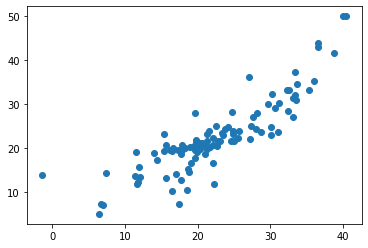

In [40]:
# Plot a scatter plot for prediction
plt.scatter(reg_pred,y_Strat_test)

In [41]:
residuals = y_Strat_test-reg_pred

In [42]:
residuals

342   -5.657076
379   -6.317256
223    0.381703
219   -7.101576
48     7.080173
         ...   
88    -7.447092
466    7.551510
52    -2.390758
121   -1.418601
218   -3.076303
Name: MEDV, Length: 102, dtype: float64

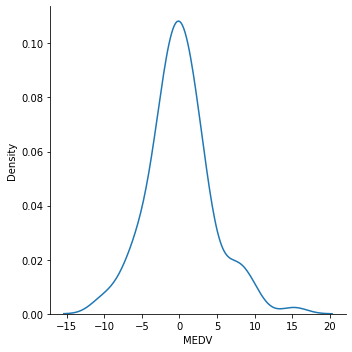

In [43]:
## plot this residuels

sns.displot(residuals,kind="kde")

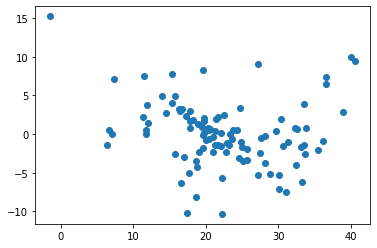

In [44]:
# scatterplot with respect to residuels and predicted value
plt.scatter(reg_pred,residuals)

points you can see are scattered uniformly
the model is performing well

In [45]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error


In [46]:
print("Mean absolute error :- ",mean_absolute_error(y_Strat_test,reg_pred))
print("Mean squared error :- ",mean_squared_error(y_Strat_test,reg_pred))
print("Root mean square :- ",np.sqrt(mean_squared_error(y_Strat_test,reg_pred)))

Mean absolute error :-  3.0906811264180143
Mean squared error :-  17.878011421887106
Root mean square :-  4.22823975454173


## R square and adjusted R square

In [47]:
from sklearn.metrics import r2_score
score=r2_score(y_Strat_test,reg_pred)
print(score)

0.7472776224570559


In [48]:
# dispaly adjusted R square
1-(1-score)*(len(y_Strat_test)-1)/(len(y_Strat_test)-x_Strat_test.shape[1]-1)

0.7099436348654846

## New Data Prediction

In [49]:
hp= housing.iloc[:, :-1]
hp.values[0].reshape(1,-1)

array([[6.320e-03, 1.800e+01, 2.310e+00, 0.000e+00, 5.380e-01, 6.575e+00,
        6.520e+01, 4.090e+00, 1.000e+00, 2.960e+02, 1.530e+01, 3.969e+02,
        4.980e+00]])

In [50]:
# Standardize the dataset
scaler.transform(hp.values[0].reshape(1,-1))

C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[-0.3526254 ,  0.16621619, -1.18940818, -0.27144836, -0.03024773,
         0.41174978, -0.05548377,  0.04787883, -0.91150503, -0.57468946,
        -1.34187006,  0.40196786, -1.05921335]])

In [51]:
regression.predict(scaler.transform(hp.values[0].reshape(1,-1)))

C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([29.7861066])

## Pickling the model file for deployment

In [52]:
import pickle

In [55]:
pickle.dump(regression,open('regmodel.pkl','wb')) #wb = writebyte

In [57]:
pickle_model = pickle.load(open('regmodel.pkl','rb'))

In [58]:
pickle_model.predict(scaler.transform(hp.values[0].reshape(1,-1)))

C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([29.7861066])